### Data Exploration

In [1]:
using CSV, DataFrames

In [2]:
brca = CSV.read("brca.csv", DataFrame, normalizenames= true);
brca = dropmissing(brca);
first(brca,5)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage
,String15,Int64,String7,Float64,Float64,Float64,Float64,String3
1,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.27368,III
2,TCGA-EW-A1OX,43,FEMALE,-0.42032,0.57807,0.61447,-0.031505,II
3,TCGA-A8-A079,69,FEMALE,0.21398,1.3114,-0.32747,-0.23426,III
4,TCGA-D8-A1XR,56,FEMALE,0.34509,-0.21147,-0.19304,0.12427,II
5,TCGA-BH-A0BF,56,FEMALE,0.22155,1.9068,0.52045,-0.31199,II


In [3]:
brca = select(brca, Not(:Patient_ID));
brca = insertcols!(brca, 1, :ID => 1:317);

In [4]:
function cat_code1(x)
    if x == "MALE"
        return 1
    else
        return 0
    end
end
brca[!,:Gender] = map(x -> cat_code1(x), brca[!, :Gender]);
# brca[!, :Gender] = cat_code1.(brca[!, :Gender]);
first(brca,5)

,ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology
,Int64,Int64,Int64,Float64,Float64,Float64,Float64,String3,String31
1,1,36,0,0.080353,0.42638,0.54715,0.27368,III,Infiltrating Ductal Carcinoma
2,2,43,0,-0.42032,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma
3,3,69,0,0.21398,1.3114,-0.32747,-0.23426,III,Infiltrating Ductal Carcinoma
4,4,56,0,0.34509,-0.21147,-0.19304,0.12427,II,Infiltrating Ductal Carcinoma
5,5,56,0,0.22155,1.9068,0.52045,-0.31199,II,Infiltrating Ductal Carcinoma


In [5]:
function cat_code2(x)
    if x == "Positive"
        return 1
    else
        return 0
    end
end
brca[!,:ER_status] = map(x -> cat_code2(x), brca[!, :ER_status]);
brca[!,:PR_status] = map(x -> cat_code2(x), brca[!, :PR_status]);
brca[!,:HER2_status] = map(x -> cat_code2(x), brca[!, :HER2_status]);
first(brca,5)

,ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology
,Int64,Int64,Int64,Float64,Float64,Float64,Float64,String3,String31
1,1,36,0,0.080353,0.42638,0.54715,0.27368,III,Infiltrating Ductal Carcinoma
2,2,43,0,-0.42032,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma
3,3,69,0,0.21398,1.3114,-0.32747,-0.23426,III,Infiltrating Ductal Carcinoma
4,4,56,0,0.34509,-0.21147,-0.19304,0.12427,II,Infiltrating Ductal Carcinoma
5,5,56,0,0.22155,1.9068,0.52045,-0.31199,II,Infiltrating Ductal Carcinoma


In [6]:
brca = select(brca, Not(:Date_of_Surgery));
brca = select(brca, Not(:Date_of_Last_Visit	));
brca = select(brca, Not(:Patient_Status));
first(brca,5)

,ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology
,Int64,Int64,Int64,Float64,Float64,Float64,Float64,String3,String31
1,1,36,0,0.080353,0.42638,0.54715,0.27368,III,Infiltrating Ductal Carcinoma
2,2,43,0,-0.42032,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma
3,3,69,0,0.21398,1.3114,-0.32747,-0.23426,III,Infiltrating Ductal Carcinoma
4,4,56,0,0.34509,-0.21147,-0.19304,0.12427,II,Infiltrating Ductal Carcinoma
5,5,56,0,0.22155,1.9068,0.52045,-0.31199,II,Infiltrating Ductal Carcinoma


### Some visualization

In [7]:
using Plots

In [8]:
using StatsPlots

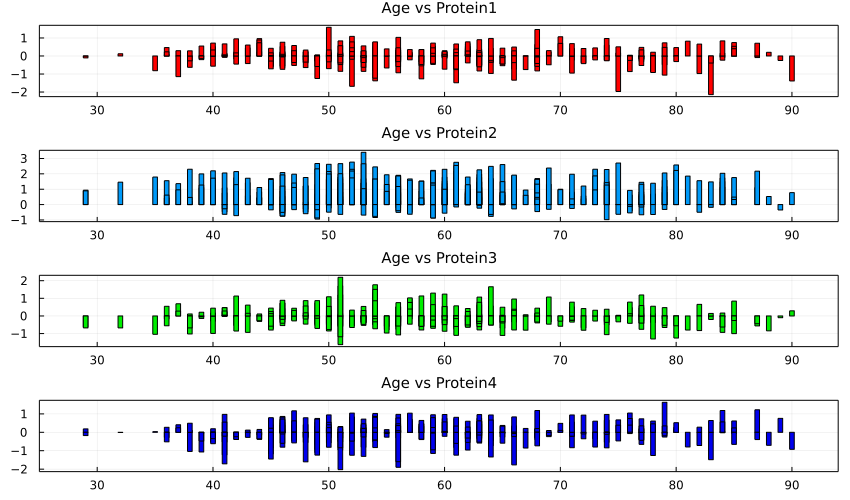

In [9]:
p1 = bar(brca[:,:Age], brca[:,:Protein1], legend = false, bar_width = 0.4, color = :red, framestyle = :box,
    title = "Age vs Protein1", titlefontsize = 10)
p2 = bar(brca[:,:Age], brca[:,:Protein2], legend = false, bar_width = 0.4, framestyle = :box,
    title = "Age vs Protein2", titlefontsize = 10)
p3 = bar(brca[:,:Age], brca[:,:Protein3], legend = false, bar_width = 0.4, color = :green2, framestyle = :box,
    title = "Age vs Protein3", titlefontsize = 10)
p4 = bar(brca[:,:Age], brca[:,:Protein4], legend = false, bar_width = 0.4, color = :blue2, framestyle = :box,
    title = "Age vs Protein4", titlefontsize = 10)
plot!(p1,p2,p3,p4, layout=(4,1), size = (850,500))

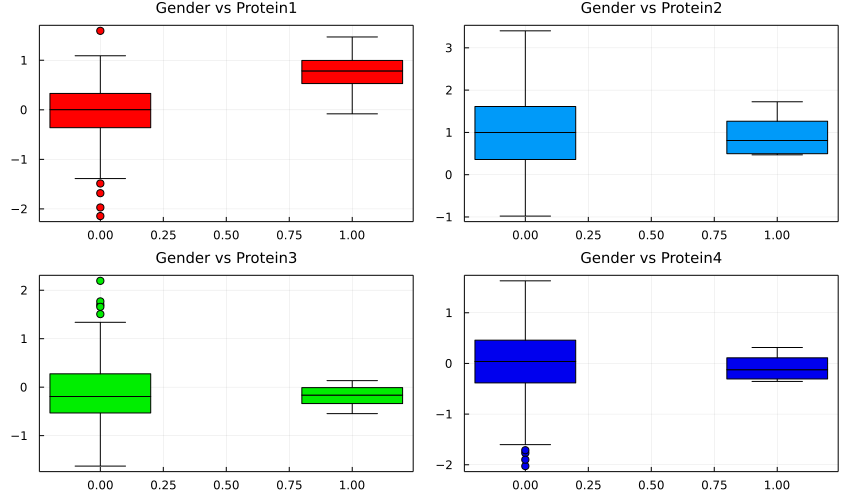

In [10]:
p5 = boxplot(brca[:,:Gender], brca[:,:Protein1], legend = false, bar_width = 0.4, color = :red, framestyle = :box,
    title = "Gender vs Protein1", titlefontsize = 10)
p6 = boxplot(brca[:,:Gender], brca[:,:Protein2], legend = false, bar_width = 0.4, framestyle = :box,
    title = "Gender vs Protein2", titlefontsize = 10)
p7 = boxplot(brca[:,:Gender], brca[:,:Protein3], legend = false, bar_width = 0.4, color = :green2, framestyle = :box,
    title = "Gender vs Protein3", titlefontsize = 10)
p8 = boxplot(brca[:,:Gender], brca[:,:Protein4], legend = false, bar_width = 0.4, color = :blue2, framestyle = :box,
    title = "Gender vs Protein4", titlefontsize = 10)
plot!(p5,p6,p7,p8, layout=(2,2), size = (850,500))

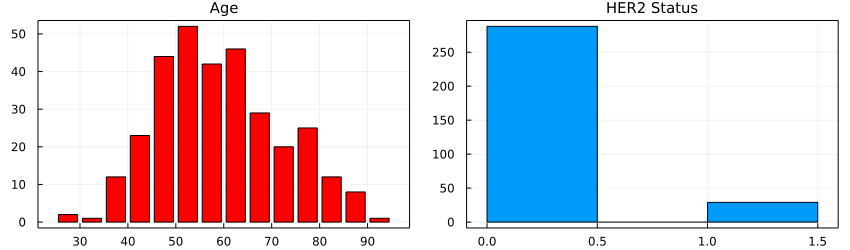

In [11]:
p9 = histogram(brca[:,:Age], legend = false, bar_width = 4, color = :red, framestyle = :box,
    title = "Age", titlefontsize = 10)
p10 = histogram(brca[:,:HER2_status], legend = false, bar_width = 0.5, framestyle = :box,
    title = "HER2 Status", titlefontsize = 10)
plot!(p9, p10, layout=(1,2), size = (850,250))

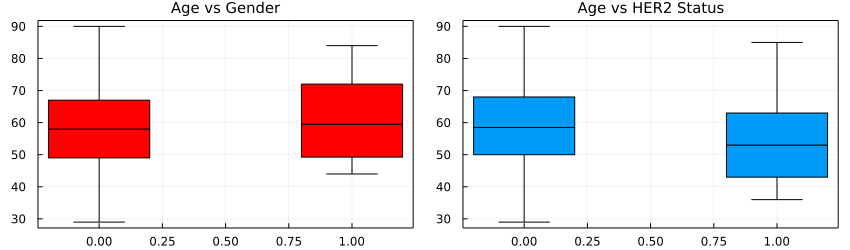

In [12]:
p11 = boxplot(brca[:,:Gender], brca[:,:Age], legend = false, bar_width = 0.4, color = :red, framestyle = :box,
    title = "Age vs Gender", titlefontsize = 10)
p12 = boxplot(brca[:,:HER2_status], brca[:,:Age], legend = false, bar_width = 0.4, framestyle = :box,
    title = "Age vs HER2 Status", titlefontsize = 10)
plot!(p11, p12, layout=(1,2), size = (850,250))

In [13]:
using Distributions

In [14]:
d1 = fit(Normal,brca[:,:Protein1]);
d2 = fit(Normal,brca[:,:Protein2]);
d3 = fit(Normal,brca[:,:Protein3]);
d4 = fit(Normal,brca[:,:Protein4]);

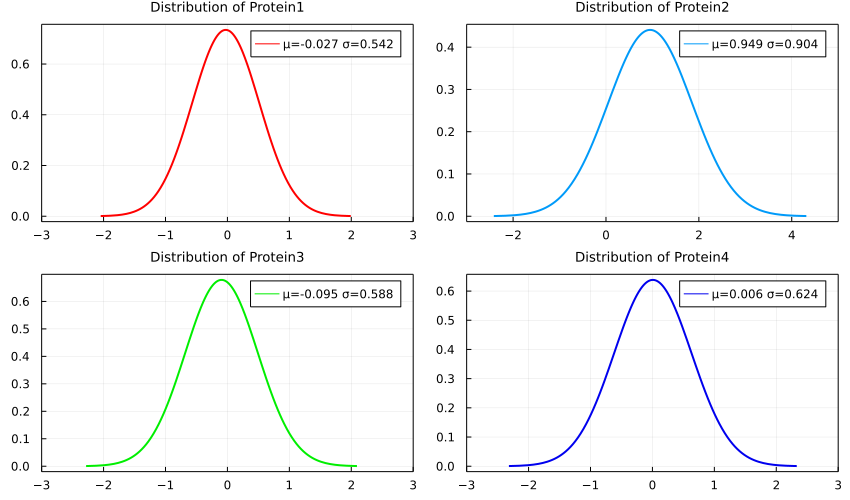

In [15]:
p13 = plot(d1, legend = true, xlim = (-3,3), size = (420,200), title = "Distribution of Protein1", titlefontsize = 9,
    label = "μ=-0.027 σ=0.542", framestyle = :box, color = :red, linewidth = 2)
p14 = plot(d2, legend = true, xlim = (-3,5), size = (420,200), title = "Distribution of Protein2", titlefontsize = 9,
    label = "μ=0.949 σ=0.904", framestyle = :box, linewidth = 2)
p15 = plot(d3, legend = true, xlim = (-3,3), size = (420,200), title = "Distribution of Protein3", titlefontsize = 9,
    label = "μ=-0.095 σ=0.588", framestyle = :box, color= :green2, linewidth = 2)
p16 = plot(d4, legend = true, xlim = (-3,3), size = (420,200), title = "Distribution of Protein4", titlefontsize = 9,
    label = "μ=0.006 σ=0.624", framestyle = :box, color = :blue2, linewidth = 2)
plot!(p13, p14, p15, p16, layout=(2,2), size = (850,500))

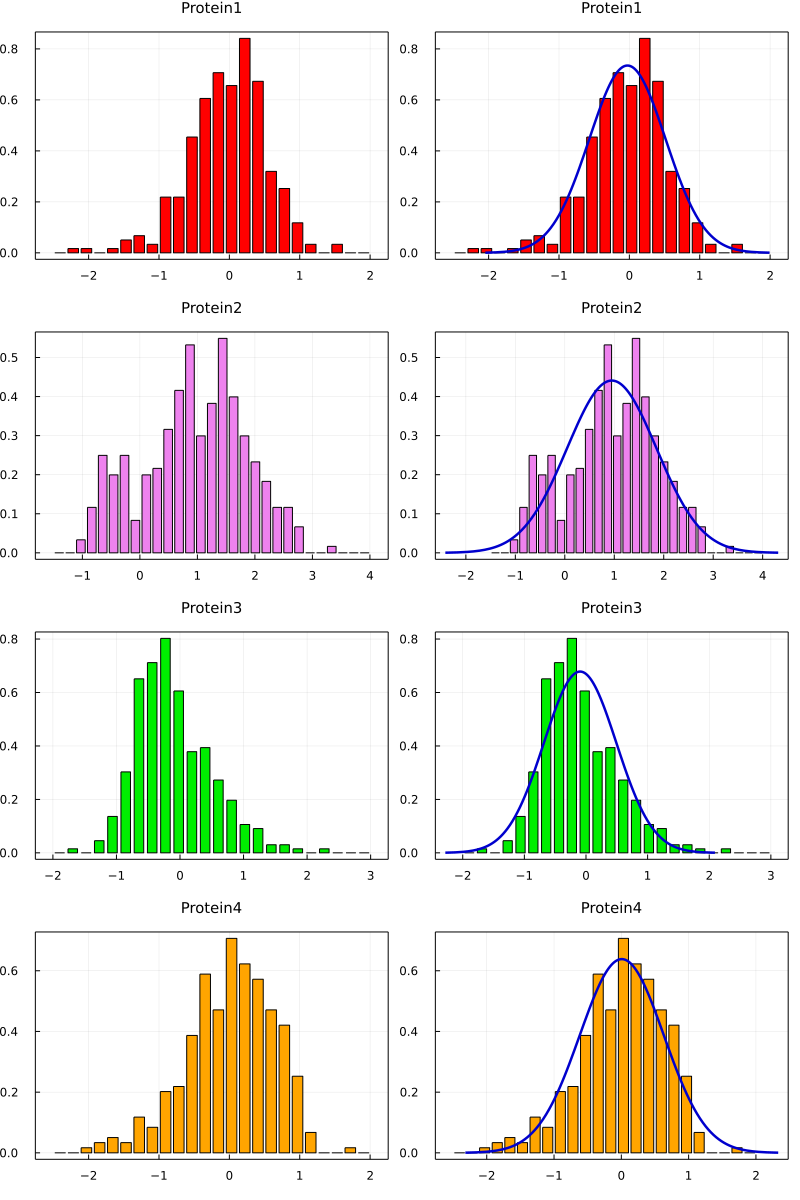

In [16]:
p17 = histogram(brca[:,:Protein1], legend = false, bar_width = 0.15, color = :red, framestyle = :box,
    title = "Protein1", titlefontsize = 10, bins = range(-2.5,2, length = 25), normalize = true)
p18 = plot(p17)
p18 = plot!(d1, linecolor = :blue3, linewidth = 2.5)

p19 = histogram(brca[:,:Protein2], legend = false, bar_width = 0.15, color = :violet, framestyle = :box,
    title = "Protein2", titlefontsize = 10, bins = range(-1.5,4, length = 30), normalize = true)
p20 = plot(p19)
p20 = plot!(d2, linecolor = :blue3, linewidth = 2.5)

p21 = histogram(brca[:,:Protein3], legend = false, bar_width = 0.15, color = :green2, framestyle = :box,
    title = "Protein3", titlefontsize = 10, bins = range(-2,3, length = 25), normalize = true)
p22 = plot(p21)
p22 = plot!(d3, linecolor = :blue3, linewidth = 2.5)

p23 = histogram(brca[:,:Protein4], legend = false, bar_width = 0.15, color = :orange, framestyle = :box,
    title = "Protein4", titlefontsize = 10, bins = range(-2.5,2, length = 25), normalize = true)
p24 = plot(p23)

p24 = plot!(d4, linecolor = :blue3, linewidth = 2.5)
plot!(p17, p18, p19, p20, p21, p22, p23, p24, layout=(4,2), size = (800,1200))

In [17]:
using PyCall

In [18]:
sns = pyimport("seaborn");
plt = pyimport("matplotlib.pyplot");

In [19]:
pyplot();

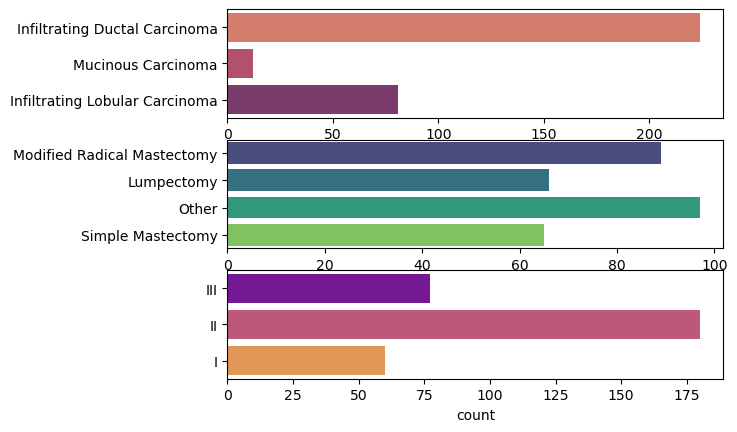

PyObject <AxesSubplot:xlabel='count'>

In [20]:
plt.subplot(311)
s1 = sns.countplot(y = brca[:,:Histology], palette = "flare")
plt.subplot(312)
s2 = sns.countplot(y = brca[:,:Surgery_type], palette = "viridis")
plt.subplot(313)
s2 = sns.countplot(y = brca[:,:Tumour_Stage], palette = "plasma")

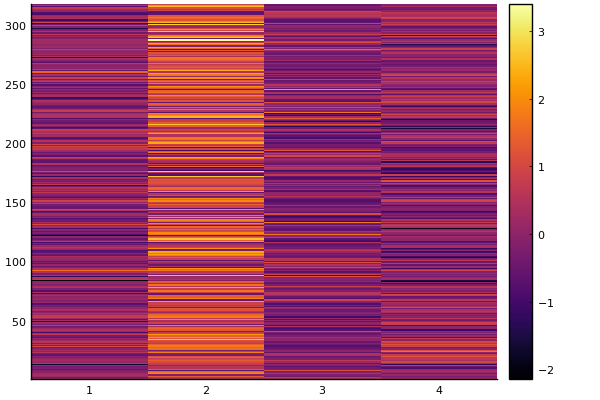

In [21]:
heatmap(Array(brca[:, [:Protein1, :Protein2, :Protein3, :Protein4]]))

In [23]:
function pairplot(df)
    rows, cols = size(df)
    scatter([row for row in 1:rows], [col for col in 1:cols],
        layout = (rows, cols))
end

pairplot (generic function with 1 method)

In [24]:
# pairplot(brca)

### Data cleaning for model building

In [25]:
first(brca,5)

,ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology
,Int64,Int64,Int64,Float64,Float64,Float64,Float64,String3,String31
1,1,36,0,0.080353,0.42638,0.54715,0.27368,III,Infiltrating Ductal Carcinoma
2,2,43,0,-0.42032,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma
3,3,69,0,0.21398,1.3114,-0.32747,-0.23426,III,Infiltrating Ductal Carcinoma
4,4,56,0,0.34509,-0.21147,-0.19304,0.12427,II,Infiltrating Ductal Carcinoma
5,5,56,0,0.22155,1.9068,0.52045,-0.31199,II,Infiltrating Ductal Carcinoma


In [26]:
brca = select(brca, Not(:ER_status));
brca = select(brca, Not(:PR_status));
first(brca,5)

,ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology
,Int64,Int64,Int64,Float64,Float64,Float64,Float64,String3,String31
1,1,36,0,0.080353,0.42638,0.54715,0.27368,III,Infiltrating Ductal Carcinoma
2,2,43,0,-0.42032,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma
3,3,69,0,0.21398,1.3114,-0.32747,-0.23426,III,Infiltrating Ductal Carcinoma
4,4,56,0,0.34509,-0.21147,-0.19304,0.12427,II,Infiltrating Ductal Carcinoma
5,5,56,0,0.22155,1.9068,0.52045,-0.31199,II,Infiltrating Ductal Carcinoma


In [27]:
ohe_tumour = select(DataFrame(Tumour_Stage= brca[!, :Tumour_Stage]),
    [:Tumour_Stage => ByRow(isequal(v)) => Symbol(v)
        for v in unique(DataFrame(Tumour_Stage= brca[!, :Tumour_Stage]).Tumour_Stage)]);
ohe_tumour.I = map(x -> Int(x), ohe_tumour.I);
ohe_tumour.II = map(x -> Int(x), ohe_tumour.II);
ohe_tumour.III = map(x -> Int(x), ohe_tumour.III);

ohe_histology = select(DataFrame(Histology= brca[!, :Histology]),
    [:Histology => ByRow(isequal(v)) => Symbol(v)
        for v in unique(DataFrame(Histology= brca[!, :Histology]).Histology)]);
ohe_histology[!,"Infiltrating Ductal Carcinoma"] = map(x -> Int(x), ohe_histology[!,"Infiltrating Ductal Carcinoma"]);
ohe_histology[!,"Infiltrating Lobular Carcinoma"] = map(x -> Int(x), ohe_histology[!,"Infiltrating Lobular Carcinoma"]);
ohe_histology[!,"Mucinous Carcinoma"] = map(x -> Int(x), ohe_histology[!,"Mucinous Carcinoma"]);

In [28]:
first(ohe_tumour,5)

,III,II,I
,Int64,Int64,Int64
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0
5,0,1,0


In [29]:
first(ohe_histology,5)

,Infiltrating Ductal Carcinoma,Mucinous Carcinoma,Infiltrating Lobular Carcinoma
,Int64,Int64,Int64
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
5,1,0,0


In [30]:
ohe_tumour = insertcols!(ohe_tumour, 1, :ID => 1:317);
ohe_histology = insertcols!(ohe_histology, 1, :ID => 1:317);

In [31]:
brca = leftjoin(brca, ohe_tumour, on = :ID);
brca = leftjoin(brca, ohe_histology, on = :ID);

In [32]:
# brca = select(brca, Not(:Tumour_Stage));
# brca = select(brca, Not(:Histology));

In [33]:
brca = select(brca, Not(:ID));

In [34]:
describe(brca)

,variable,mean,min,median
,Symbol,Union…,Any,Union…
1,Age,58.7256,29,58.0
2,Gender,0.0126183,0,0.0
3,Protein1,-0.0272321,-2.1446,0.0056486
4,Protein2,0.949557,-0.97873,0.99713
5,Protein3,-0.095104,-1.6274,-0.19304
6,Protein4,0.00671301,-2.0255,0.038522
7,Tumour_Stage,,I,
8,Histology,,Infiltrating Ductal Carcinoma,
9,HER2_status,0.0914826,0,0.0


### Model building

In [35]:
using ScikitLearn
using ScikitLearn.CrossValidation: train_test_split

In [36]:
X = Array(brca[!, ["Age", "Gender", "Protein1", "Protein2", "Protein3", "Protein4",
            "HER2_status", "Infiltrating Ductal Carcinoma", "Mucinous Carcinoma", "Infiltrating Lobular Carcinoma"]]);

In [37]:
y = Array(brca[!, [:Surgery_type]]);

In [38]:
@sk_import linear_model: LogisticRegression

PyObject <class 'sklearn.linear_model._logistic.LogisticRegression'>

In [39]:
@sk_import metrics: accuracy_score;

In [40]:
np = pyimport("numpy");

In [41]:
function optimal_size()
    max_accuracy = 0.35
    size = 0.01
    for i in collect(range(0.01, step=0.001, stop=0.4))
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state = 98107);
        model = LogisticRegression(max_iter = 1000);
        fit!(model, X_train, np.ravel(y_train));
        y_pred = predict(model, X_test);
        accuracy = accuracy_score(y_pred, y_test)
        if accuracy > max_accuracy
            max_accuracy = accuracy
            size = i
        end
    end
    return max_accuracy, size
end

optimal_size (generic function with 1 method)

In [42]:
optimal_size()

(0.5, 0.01)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3);

In [44]:
model = LogisticRegression(max_iter = 1000);

In [45]:
fit!(model, X_train, np.ravel(y_train));

In [46]:
y_pred = predict(model, X_test);

In [47]:
accuracy = accuracy_score(y_pred, y_test)

0.3333333333333333